# Building good training sets pg 107 -Python Machine Learning, S.Raschka & V. Mirjalili

In [86]:
import pandas as pd
from io import StringIO
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.base import clone
from itertools import combinations
from sklearn.metrics import accuracy_score

In [2]:
abc = \
'''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''

In [3]:
df=pd.read_csv(StringIO(abc))

In [4]:
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [5]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [6]:
df.values

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

In [7]:
df.dropna(axis=0)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [8]:
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [9]:
df.dropna(how='all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [10]:
df.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [11]:
df.dropna(subset=['D'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0


In [12]:
imr = SimpleImputer(missing_values=np.nan, strategy='mean')
#imr.fit(df.values)

In [13]:
imr=imr.fit(df.values)

In [14]:
imputed_data=imr.transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [15]:
df = pd.DataFrame([['green','M',10.1,'class1'],['red','L',13.5,'class2'],['blue','XL',15.3,'class1']])
df.columns = ['color','size','price','classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [16]:
size_mapping = {'XL':3,
                'L':2,
                'M':1}
df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [17]:
inv_size_mapping = {v : k for k, v in size_mapping.items()} #inverting elements in the dictionary
df['size']=df['size'].map(inv_size_mapping)
print(inv_size_mapping)
df

{3: 'XL', 2: 'L', 1: 'M'}


,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [18]:
class_mapping = {label: idx for idx,label in enumerate(np.unique(df['classlabel']))}#directly making the dictionary with {'class':index,...} bc it doesn't matter what number each class has
class_mapping

{'class1': 0, 'class2': 1}

In [19]:
df['classlabel']=df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,M,10.1,0
1,red,L,13.5,1
2,blue,XL,15.3,0


In [20]:
inv_class_mapping = {v : k for k, v in class_mapping.items()}
df['classlabel']=df['classlabel'].map(inv_class_mapping)
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [21]:
#faster
class_le=LabelEncoder()
df['classlabel']=class_le.fit_transform(df['classlabel'].values)
print(df)
#df['classlabel']=class_le.inverse_transform(y)
#print(df)

   color size  price  classlabel
0  green    M   10.1           0
1    red    L   13.5           1
2   blue   XL   15.3           0


In [22]:
X = df[['color','size','price']].values
color_le = LabelEncoder()
X[:,0] = color_le.fit_transform(X[:,0])
X

array([[1, 'M', 10.1],
       [2, 'L', 13.5],
       [0, 'XL', 15.3]], dtype=object)

In [23]:
df


,color,size,price,classlabel
0,green,M,10.1,0
1,red,L,13.5,1
2,blue,XL,15.3,0


In [24]:
np_df = np.array(pd.get_dummies(df[['price','color','size']]))
np_df

array([[10.1,  0. ,  1. ,  0. ,  0. ,  1. ,  0. ],
       [13.5,  0. ,  0. ,  1. ,  1. ,  0. ,  0. ],
       [15.3,  1. ,  0. ,  0. ,  0. ,  0. ,  1. ]])

In [25]:
np.delete(np_df, 2, axis=1)

array([[10.1,  0. ,  0. ,  0. ,  1. ,  0. ],
       [13.5,  0. ,  1. ,  1. ,  0. ,  0. ],
       [15.3,  1. ,  0. ,  0. ,  0. ,  1. ]])

## Wine example

In [26]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                     'ml/machine-learning-databases/'
                     'wine/wine.data',header=None)
df_wine

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


### Classes 

In [27]:
df_wine.columns = ['Class label','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoids phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']
print('Class labels',np.unique(df_wine['Class label']))

Class labels [1 2 3]


In [28]:
df_wine.head(n=3)

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoids phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185


### Divide train and test

In [30]:
X,y = df_wine.iloc[:,1:].values,df_wine.iloc[:,0].values
X_train,X_test,y_train,y_values=\
    train_test_split(X,y,
                    test_size=0.3)


In [31]:
y


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int64)

In [32]:
X_test.shape

(54, 13)

### Standardize and normalize

In [34]:
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [35]:
X_train_norm.shape

(124, 13)

In [36]:
X_train_norm.shape

(124, 13)

In [37]:
ex = np.array([0,1,2,3,4,5])
print('standardized',(ex - ex.mean()) / ex.std())
print('normalized',(ex - ex.min()) / (ex.max()-ex.min()))

standardized [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]
normalized [0.  0.2 0.4 0.6 0.8 1. ]


In [38]:
stdsc = StandardScaler()
X_train_std =  stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

### L1 and L2 regularization penalties

In [39]:
LogisticRegression(penalty='l1')
lr=LogisticRegression(penalty='l1',C=1.0,solver='liblinear')#the lower is c, the more zero entries (enforce sparsity)
lr.fit(X_train_std,y_train)
#print('Training accuracy: ', lr.score(X_train_std,y_train))

LogisticRegression(penalty='l1', solver='liblinear')

In [40]:
print('Training accuracy: ', lr.score(X_train_std,y_train))
lr.intercept_

Training accuracy:  1.0


array([-1.02410389, -1.35439963, -2.27317004])

In [54]:
lr.coef_.shape[1]

13

In [45]:
df_wine

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoids phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


[ -4.31549558  -5.03120422  -7.19917353   3.53608337   1.89803948
  -0.20997422   3.68182944   3.51778129   2.99064521 -14.62986252
   3.3066815   -2.32114804 -16.36608522]


<function matplotlib.pyplot.show(*args, **kw)>

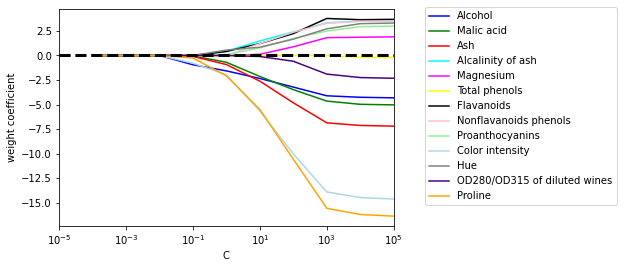

In [60]:
fig = plt.figure()
ax = plt.subplot(111)

colors = ['blue','green','red','cyan','magenta','yellow','black','pink','lightgreen','lightblue','gray','indigo','orange']
weights,params = [], []

for c in np.arange(-4,6): #10 different C values
    lr = LogisticRegression(penalty='l1',
                            C=10.**c,
                            random_state=0,
                            solver='liblinear')
    lr.fit(X_train_std,y_train)
    weights.append(lr.coef_[1])#13 weights of class2
    params.append(10.**c)#each value of C parameter used
weights = np.array(weights)

for column, color in zip(range(weights.shape[1]),colors):#we can substitute the zip for enumerate(colors). Here each column (feature) is assigned to a color
    plt.plot(params,weights[:,column],#plotting in each iteration: all 10 C values for 1 feature column which contains 10 weights, one for each value of C. 13 iterations, one for each feature
            label=df_wine.columns[column+1],
            color=color)
plt.axhline(0,color='black',linestyle='--',linewidth=3)
plt.xlim([10.**(-5),10.**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper center',
          bbox_to_anchor=(1.38,1.03),
          ncol=1,fancybox=True)
plt.show

## Sequential feature selection algorithms

## SBS sequential backward selection

In [130]:
class SBS():
    def __init__(self, estimator, k_features, #k_features specify the the number of features we want to return
                scoring=accuracy_score,
                test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                            random_state=self.random_state)
        dim = X_train.shape[1]#(13, ) dimensions
        
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, X_test, y_test, self.indices_)
        self.scores_ = [score]
        while dim > self.k_features:
            scores = []
            subsets = []
            
            for p in combinations(self.indices_,r=dim-1):#intertools.combinations creates the feature subsets
                score=self._calc_score(X_train,y_train,
                                      X_test,y_test,p)
                scores.append(score)#accuracy score for each p
                subsets.append(p)

            best=np.argmax(scores)#gives position of the highest score
            self.indices_=subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            self.scores_.append(scores[best])
        self.k_score = self.scores_[-1]
        return self
    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self,X_train,y_train,X_test,y_test,indices):

        self.estimator.fit(X_train[:,indices], y_train)
        y_pred = self.estimator.predict(X_test[:,indices])
        score = self.scoring(y_test,y_pred)#calculating accuracy score with sklearn
        return score

In [131]:
knn = KNeighborsClassifier(n_neighbors=5)
sbs = SBS(knn,k_features=1)
sbs.fit(X_train_std,y_train)


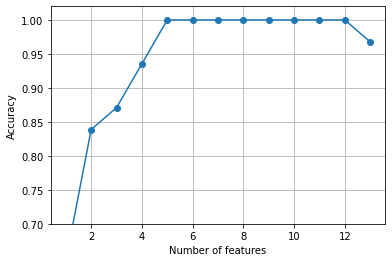

In [132]:
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat,sbs.scores_,marker='o')
plt.ylim([0.7,1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.show()

In [110]:
print(combinations((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),r=12))